In [1]:
import os
import numpy as np
import imageio
import pdb
from matplotlib import pyplot as plt
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

# Problem1 

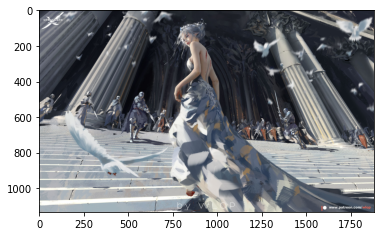

In [2]:
# input image 
img = imageio.imread("colorIM.jpeg")
plt.imshow(img)

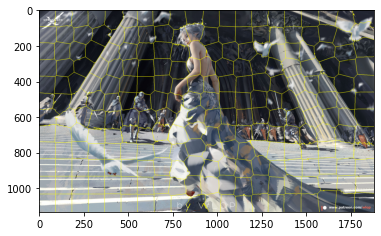

In [3]:
for n in [10, 100, 200, 250]:
    for compact in [10., 25., 100.]:
        segments_slic = slic(img, n_segments=n, compactness=compact)
        plt.clf()
        #plt.imshow(segments_slic)
        plt.imshow(mark_boundaries(img,segments_slic))
        plt.savefig(os.path.join("problem1","segment{:03d}_compactness{:.2f}.png".format(n, compact)))


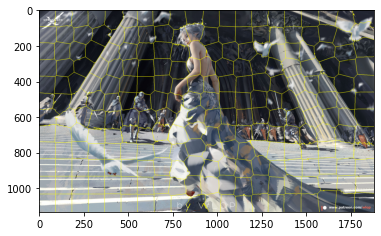

In [4]:
# this is one of the outputs 
plt.imshow(mark_boundaries(img,segments_slic))

**Discussion:**

For problem one, I set the n_segments with 10, 100, 200, and 250 and the compactness with 10 , 25, and 100. You need to create a folder named problem1 to store the outputs. All of the output will in that folder. 


# Problem 2

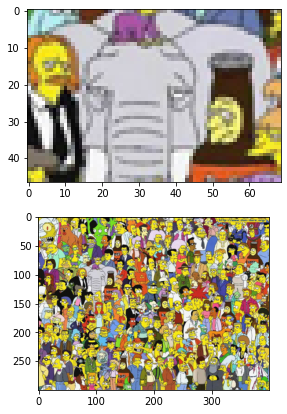

In [5]:
# input images
template = imageio.imread("template.png")
search = imageio.imread("search.png")

plt.figure(figsize=(7,7))

plt.subplot(2,1,1)
plt.imshow(template)

plt.subplot(2,1,2)
plt.imshow(search)

In [6]:
template = imageio.imread("template.png")
search = imageio.imread("search.png")

th, tw, _ = template.shape
sh, sw, _ = search.shape

nccs = np.zeros((sh - th , sw - tw), dtype=np.float32)
for i in range(sh - th):
    for j in range(sw - tw):
        for k in range(3):
            patch = search[i:i+th, j:j+tw]
            nccs[i, j] += (((template[:, :, k] - template[:, :, k].mean()) *
                              (patch[:, :, k] - patch[:, :, k].mean())).sum() / \
                                (np.std(patch, ddof=1) * np.std(template, ddof=1) * (th * tw - 1)))/3


In [7]:
ind = (-nccs.flatten()).argsort()
for i in [1, 2, 5, 10, 100, 500]:
    bh, bw = ind[i - 1] // nccs.shape[1], ind[i - 1] % nccs.shape[1]
    imageio.imwrite(os.path.join("closest{:03d}.png".format(i)), search[bh:bh+th, bw:bw+tw])

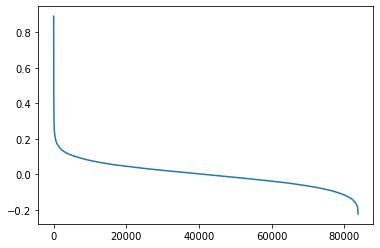

In [8]:
# plot all tof the sorted scores
nccs = np.sort(nccs, axis=None)
nccs = nccs[::-1]
plt.clf()
plt.plot(nccs)
plt.savefig(os.path.join("ncc.png"))

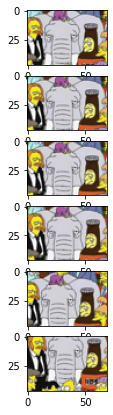

In [9]:
# show the patches corresponding to the 1, 2, 5, 10, 100, 500
c1 = imageio.imread("closest001.png")
c2 = imageio.imread("closest002.png")
c5 = imageio.imread("closest005.png")
c10 = imageio.imread("closest010.png")
c100 = imageio.imread("closest100.png")
c500 = imageio.imread("closest500.png")

plt.figure(figsize=(7,7))

plt.subplot(6,1,1)
plt.imshow(c1)

plt.subplot(6,1,2)
plt.imshow(c2)

plt.subplot(6,1,3)
plt.imshow(c5)

plt.subplot(6,1,4)
plt.imshow(c10)

plt.subplot(6,1,5)
plt.imshow(c100)

plt.subplot(6,1,6)
plt.imshow(c500)

**Discussion:**

We can see the 1st output image matching the template image best.